# Heap Sort
### Sabryn Bley & Thomas Benzshawel
### CSC 3310 Lab 4
### Fall 2023

## Introduction: 

Heapsort is a simple algorithm used to sort values. When implementing this algorithm in real-world applications, it is important to understand the efficiency on different datasets. To explore the limitations of the algorithm, this notebook explores the run time of different heap operations on different numerical Python lists. From this we can create a Big-O analysis of each method and identify strengths and limitations.

This notebook includes benchmarking inserting one element at a time, all elements at once, and extracting one element at a time. This notebook explores how the run time changes as the size of the list increases. Additionally, it compares how the run time changes for lists that are already, randomly, and inversely sorted. This notebook explores the best case (inversely sorted), average case (randomly shuffled), and the worst case (already sorted). From these tests, we can deduce which methods/operations are more practical with specific datasets. To complete these tasks, the notebook uses the functionality of time, matplotlib, scipy, copy, random, and numpy libraries. As well as the implemented heap.py script.

## Set-Up:

The following cell imports the required libraries needed to complete the operations in this
notebook. The cell imports the time library, the copy library, the random library, the linregress
object from the scipy library, and a plt object from matplotlib. The majority of these libraries will
be used for benchmarking. Additionally, they will be used to create visualizations to create comprehensive analyses from the experimental results. The heap.py script is also imported to the notebook.

In [26]:
import random
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import copy
import heap

## The Code:

**Function Declarations:**

The following cell defines a helper function to create three heaps of values. These heaps are in sorted, random, and reverse order. Additionally, they use a param n to define how many elements are in the heap. The created heaps are returned. This function is used to create heaps for benchmarking later in the notebook.

In [3]:
def make_heaps(n):
    """
    This function creates three differently sorted Python lists of length n. These lists
    are in sorted, random, and inverse order. To accomplish this the random and copy
    libraries are used.
    
    :param n: Length of the lists
    :return: The three lists.
    """
    # DEFINE LIST
    l = list()
    
    # GENERATE RANDOM NUMBERS
    for x in range(0, n):
        l.append(random.random())

    # CREATE SORTED HEAP
    sorted_heap = copy.deepcopy(l) # create copy
    sorted_heap.sort(reverse = False) # sort in ascending order
    heap.build_max_heap(sorted_heap) # make a heap

    # CREATE RANDOM HEAP
    random_heap = copy.deepcopy(l) # create copy
    random.shuffle(random_heap) # shuffle
    heap.build_max_heap(random_heap) # make a heap

    # CREATE REVERSE SORTED HEAP
    reverse_sorted_heap = copy.deepcopy(l) # create copy
    reverse_sorted_heap.sort(reverse = True) # sort in descending order
    heap.build_max_heap(reverse_sorted_heap) # make a heap

    
    return sorted_heap, random_heap, reverse_sorted_heap 

The following cell defines a helper function to create three lists of values. These heaps are in sorted, random, and reverse order. Additionally, they use a param n to define how many elements are in the heap. The created lists are returned. This function is used to create lists for benchmarking later in the notebook.

In [4]:
def make_lists(n):
    """
    This function creates three differently sorted Python lists of length n. These lists
    are in sorted, random, and inverse order. To accomplish this the random and copy
    libraries are used.
    
    :param n: Length of the lists
    :return: The three lists.
    """
    # DEFINE LIST
    l = list()

    # GENERATE RANDOM NUMBERS
    for x in range(0, n):
        l.append(random.random())

    # CREATE SORTED HEAP
    sorted_list = copy.deepcopy(l) # create copy
    sorted_list.sort(reverse = False) # sort in ascending order

    # CREATE RANDOM HEAP
    random_list = copy.deepcopy(l) # create copy
    random.shuffle(random_list) # shuffle

    # CREATE REVERSE SORTED HEAP
    reverse_sorted_list = copy.deepcopy(l) # create copy
    reverse_sorted_list.sort(reverse = True) # sort in descending order

    # RETURN LISTS
    return sorted_list, random_list, reverse_sorted_list

The following cell defines a helper function that benchmarks inserting a key into a heap (max_heap_insert()).

In [5]:
def benchmark_insert(hp, value):
    """
    This function uses the time library to benchmark inserting a value into
    a heap. The function takes in the heap (list) and the value (key) to be 
    inserted. It then times the algorithm and returns the time as a long.

    :param hp: The list representing a heap (of numericals) to benchmark.
    :param value: The key to be inserted.
    :return elapsed: The benchmark time for the sorting algorithm to sort 
                     the inputted list. This time is represented as a long.
    """

    # BENCHMARK
    start_time = time.perf_counter()
    heap.max_heap_insert(hp, value)
    end_time = time.perf_counter()
    
    # CALCULATE RUN TIME
    elapsed = end_time - start_time
    return elapsed

The following cell defines a helper method to benchmark adding values to a heap all at once (build_max_heap()).

In [6]:
def benchmark_making_heap(values):
    """
    This function uses the time library to benchmark inserting values into
    a heap all at once. The function takes in the values (keys) to be inserted. 
    It then times the algorithm and returns the time as a long.

    :param values: The list of keys to be inserted.
    :return elapsed: The benchmark time for the sorting algorithm to sort 
                     the inputted list. This time is represented as a long.
    """

    # BENCHMARK
    start_time = time.perf_counter()
    heap.build_max_heap(values)
    end_time = time.perf_counter()

    # CALCULATE RUN TIME
    elapsed = end_time - start_time
    return elapsed

The following cell defines a helper function to benchmark extracting a value from a heap (heap_extract_max()).

In [7]:
def benchmark_extract(hp):
    """
    This function uses the time library to benchmark extracting a value from
    a heap. The function takes in the heap (list). It then times the algorithm 
    and returns the time as a long.

    :param hp: The list representing a heap (of numericals) to benchmark.
    :return elapsed: The benchmark time for the sorting algorithm to sort 
                     the inputted list. This time is represented as a long.
    """

    # BENCHMARK
    start_time = time.perf_counter()
    heap.heap_extract_max(hp)
    end_time = time.perf_counter()

    # CALCULATE RUN TIME
    elapsed = end_time - start_time
    return elapsed

The following cell runs the test_heap.py script. This is to ensure that our implementation of a heap is correct. The test_heap.py file was given in the lab 4 description.

In [8]:
%run test_heap.py

....
----------------------------------------------------------------------
Ran 4 tests in 0.011s

OK


[0.0922878987664012, 0.940569741333456, 0.5935299066716434, 0.904087227555913, 0.332390199449087, 0.3354588335193709, 0.48896866864540844, 0.013967447998286975, 0.21892107229584623, 0.9570684113507277]
[0.0922878987664012, 0.904087227555913, 0.5935299066716434, 0.21892107229584623, 0.332390199449087, 0.3354588335193709, 0.48896866864540844, 0.013967447998286975, 0.940569741333456, 0.9570684113507277]
[0.013967447998286975, 0.332390199449087, 0.5935299066716434, 0.21892107229584623, 0.0922878987664012, 0.3354588335193709, 0.48896866864540844, 0.904087227555913, 0.940569741333456, 0.9570684113507277]
[0.013967447998286975, 0.332390199449087, 0.48896866864540844, 0.21892107229584623, 0.0922878987664012, 0.3354588335193709, 0.5935299066716434, 0.904087227555913, 0.940569741333456, 0.9570684113507277]
[0.013967447998286975, 0.332390199449087, 0.3354588335193709, 0.21892107229584623, 0.0922878987664012, 0.48896866864540844, 0.5935299066716434, 0.904087227555913, 0.940569741333456, 0.95706841

### Benchmarks: 

##### Inserting Elements:

The following cell creates Python lists of various lengths and differing prior sorting. These lists will be used to create copies for each benchmark.

In [9]:
# LISTS OF LENGTH 100
ascending_case_100, random_case_100, descending_case_100 = make_lists(100)

# LISTS OF LENGTH 1,000
ascending_case_1000, random_case_1000, descending_case_1000 = make_lists(1000)

# LISTS OF LENGTH 10,000
ascending_case_10000, random_case_10000, descending_case_10000 = make_lists(10000)

# LISTS OF LENGTH 100,000
ascending_case_100000, random_case_100000, descending_case_100000 = make_lists(100000)

**Sorted Heap:**

The following cell benchmarks inserting the sorted keys into the heap. This is done 10 times for each list size. These values are stored in a Python list.

In [10]:
# CREATE LISTS TO STORE SORTED CASE BENCHMARKS
sorted_heap_benchmarks = list() # holds average time for each list length
sorted_times_100 = list() # holds 10 trial times for n = 100
sorted_times_1000 = list() # holds 10 trial times for n = 1,000
sorted_times_10000 = list() # holds 10 trial times for n = 10,000
sorted_times_100000 = list() # holds 10 trial times for n = 100,000

# RUN & STORE SORTED HEAP BENCHMARKS
for x in range(0, 10):
    case_100 = list() # n = 100
    timer = 0
    for value in ascending_case_100:
        timer = timer + benchmark_insert(case_100, value)
    sorted_times_100.append(timer)

    case_1000 = list() # n = 1,000
    timer = 0
    for value in ascending_case_1000:
        timer = timer + benchmark_insert(case_1000, value)
    sorted_times_1000.append(timer)

    case_10000 = list() # n = 10,000
    timer = 0
    for value in ascending_case_10000:
        timer = timer + benchmark_insert(case_10000, value)
    sorted_times_10000.append(timer)

    case_100000 = list() # n = 100,000
    timer = 0
    for value in ascending_case_100000:
        timer = timer + benchmark_insert(case_100000, value)
    sorted_times_100000.append(timer)

# CALCULATE AVERAGE TIME
sorted_heap_benchmarks.append(sum(sorted_times_100) / len(sorted_times_100))
sorted_heap_benchmarks.append(sum(sorted_times_1000) / len(sorted_times_1000))
sorted_heap_benchmarks.append(sum(sorted_times_10000) / len(sorted_times_10000))
sorted_heap_benchmarks.append(sum(sorted_times_100000) / len(sorted_times_100000))

# PRINT BENCHMARKS
print("Sorted Heap: ", sorted_heap_benchmarks)

Sorted Heap:  [0.00040254034101963045, 0.005884541105479002, 0.08677412690594792, 1.0988811049144716]


**Randomly Sorted Heap:**

The following cell benchmarks inserting the randomly-sorted keys into the heap. This is done 10 times for each list size. These values are stored in a Python list.

In [11]:
# CREATE LISTS TO STORE RANDOMLY SORTED CASE BENCHMARKS
random_heap_benchmarks = list() # holds average time for each list length
random_times_100 = list() # holds 10 trial times for n = 100
random_times_1000 = list() # holds 10 trial times for n = 1,000
random_times_10000 = list() # holds 10 trial times for n = 10,000
random_times_100000 = list() # holds 10 trial times for n = 100,000

# RUN & STORE RANDOMLY SORTED HEAP BENCHMARKS
for x in range(0, 10):
    case_100 = list() # n = 100
    timer = 0
    for value in random_case_100:
        timer = timer + benchmark_insert(case_100, value)
    random_times_100.append(timer)

    case_1000 = list() # n = 1,000
    timer = 0
    for value in random_case_1000:
        timer = timer + benchmark_insert(case_1000, value)
    random_times_1000.append(timer)

    case_10000 = list() # n = 10,000
    timer = 0
    for value in random_case_10000:
        timer = timer + benchmark_insert(case_10000, value)
    random_times_10000.append(timer)

    case_100000 = list() # n = 100,000
    timer = 0
    for value in random_case_100000:
        timer = timer + benchmark_insert(case_100000, value)
    random_times_100000.append(timer)

# CALCULATE AVERAGE TIME
random_heap_benchmarks.append(sum(random_times_100) / len(random_times_100))
random_heap_benchmarks.append(sum(random_times_1000) / len(random_times_1000))
random_heap_benchmarks.append(sum(random_times_10000) / len(random_times_10000))
random_heap_benchmarks.append(sum(random_times_100000) / len(random_times_100000))

# PRINT BENCHMARKS
print("Randomly-Sorted Heap: ", random_heap_benchmarks)

Randomly-Sorted Heap:  [0.00014555011875927448, 0.0015765098156407475, 0.017279621469788252, 0.1836572211002931]


**Inversely Sorted Heap:**

The following cell benchmarks inserting the inversely-sorted keys into the heap. This is done 10 times for each list size. These values are stored in a Python list.

In [12]:
# CREATE LISTS TO STORE INVERSELY SORTED CASE BENCHMARKS
inverse_heap_benchmarks = list() # holds average time for each list length
inverse_times_100 = list() # holds 10 trial times for n = 100
inverse_times_1000 = list() # holds 10 trial times for n = 1,000
inverse_times_10000 = list() # holds 10 trial times for n = 10,000
inverse_times_100000 = list() # holds 10 trial times for n = 100,000

# RUN & STORE INVERSELY SORTED HEAP BENCHMARKS
for x in range(0, 10):
    case_100 = list() # n = 100
    timer = 0
    for value in descending_case_100:
        timer = timer + benchmark_insert(case_100, value)
    inverse_times_100.append(timer)

    case_1000 = list() # n = 1,000
    timer = 0
    for value in descending_case_1000:
        timer = timer + benchmark_insert(case_1000, value)
    inverse_times_1000.append(timer)

    case_10000 = list() # n = 10,000
    timer = 0
    for value in descending_case_10000:
        timer = timer + benchmark_insert(case_10000, value)
    inverse_times_10000.append(timer)

    case_100000 = list() # n = 100,000
    timer = 0
    for value in descending_case_100000:
        timer = timer + benchmark_insert(case_100000, value)
    inverse_times_100000.append(timer)

# CALCULATE AVERAGE TIME
inverse_heap_benchmarks.append(sum(inverse_times_100) / len(inverse_times_100))
inverse_heap_benchmarks.append(sum(inverse_times_1000) / len(inverse_times_1000))
inverse_heap_benchmarks.append(sum(inverse_times_10000) / len(inverse_times_10000))
inverse_heap_benchmarks.append(sum(inverse_times_100000) / len(inverse_times_100000))

# PRINT BENCHMARKS
print("Inversely-Sorted Heap: ", inverse_heap_benchmarks)

Inversely-Sorted Heap:  [7.150953169912099e-05, 0.0007465695030987263, 0.007091252040117979, 0.07925287005491555]


##### Inserting Elements All At Once:

**Sorted Heap:**

In [13]:
# CREATE LISTS TO STORE SORTED CASE BENCHMARKS
all_sorted_heap_benchmarks = list() # holds average time for each list length
all_sorted_times_100 = list() # holds 10 trial times for n = 100
all_sorted_times_1000 = list() # holds 10 trial times for n = 1,000
all_sorted_times_10000 = list() # holds 10 trial times for n = 10,000
all_sorted_times_100000 = list() # holds 10 trial times for n = 100,000

# RUN & STORE SORTED INSERT ALL BENCHMARKS
for x in range(0, 10):
    all_sorted_times_100.append(benchmark_making_heap(copy.deepcopy(ascending_case_100))) 
    all_sorted_times_1000.append(benchmark_making_heap(copy.deepcopy(ascending_case_1000)))
    all_sorted_times_10000.append(benchmark_making_heap(copy.deepcopy(ascending_case_10000)))
    all_sorted_times_100000.append(benchmark_making_heap(copy.deepcopy(ascending_case_100000)))

# CALCULATE AVERAGE TIME
all_sorted_heap_benchmarks.append(sum(all_sorted_times_100) / len(all_sorted_times_100))
all_sorted_heap_benchmarks.append(sum(all_sorted_times_1000) / len(all_sorted_times_1000))
all_sorted_heap_benchmarks.append(sum(all_sorted_times_10000) / len(all_sorted_times_10000))
all_sorted_heap_benchmarks.append(sum(all_sorted_times_100000) / len(all_sorted_times_100000))

# PRINT BENCHMARKS
print("Sorted Heap: ", all_sorted_heap_benchmarks)

Sorted Heap:  [0.00010814000852406025, 0.0017308099661022425, 0.008108070027083159, 0.09421856997068971]


**Randomly Sorted Heap:**

In [14]:
# CREATE LISTS TO STORE RANDOMLY SORTED CASE BENCHMARKS
all_randomly_heap_benchmarks = list() # holds average time for each list length
all_randomly_times_100 = list() # holds 10 trial times for n = 100
all_randomly_times_1000 = list() # holds 10 trial times for n = 1,000
all_randomly_times_10000 = list() # holds 10 trial times for n = 10,000
all_randomly_times_100000 = list() # holds 10 trial times for n = 100,000

# RUN & STORE RANDOMLY SORTED INSERT ALL BENCHMARKS
for x in range(0, 10):
    all_randomly_times_100.append(benchmark_making_heap(copy.deepcopy(random_case_100)))
    all_randomly_times_1000.append(benchmark_making_heap(copy.deepcopy(random_case_1000)))
    all_randomly_times_10000.append(benchmark_making_heap(copy.deepcopy(random_case_10000)))
    all_randomly_times_100000.append(benchmark_making_heap(copy.deepcopy(random_case_100000)))

# CALCULATE AVERAGE TIME
all_randomly_heap_benchmarks.append(sum(all_randomly_times_100) / len(all_randomly_times_100))
all_randomly_heap_benchmarks.append(sum(all_randomly_times_1000) / len(all_randomly_times_1000))
all_randomly_heap_benchmarks.append(sum(all_randomly_times_10000) / len(all_randomly_times_10000))
all_randomly_heap_benchmarks.append(sum(all_randomly_times_100000) / len(all_randomly_times_100000))

# PRINT BENCHMARKS
print("Randomly-Sorted Heap: ", all_randomly_heap_benchmarks)

Randomly-Sorted Heap:  [7.263992447406053e-05, 0.0008340599946677685, 0.007450270047411322, 0.08852840997278691]


**Inversely Sorted Heap:**

In [15]:
# CREATE LISTS TO STORE INVERSELY SORTED CASE BENCHMARKS
all_inversely_heap_benchmarks = list() # holds average time for each list length
all_inversely_times_100 = list() # holds 10 trial times for n = 100
all_inversely_times_1000 = list() # holds 10 trial times for n = 1,000
all_inversely_times_10000 = list() # holds 10 trial times for n = 10,000
all_inversely_times_100000 = list() # holds 10 trial times for n = 100,000

# RUN & STORE INVERSELY SORTED INSERT ALL BENCHMARKS
for x in range(0, 10):
    all_inversely_times_100.append(benchmark_making_heap(copy.deepcopy(descending_case_100)))
    all_inversely_times_1000.append(benchmark_making_heap(copy.deepcopy(descending_case_1000)))
    all_inversely_times_10000.append(benchmark_making_heap(copy.deepcopy(descending_case_10000)))
    all_inversely_times_100000.append(benchmark_making_heap(copy.deepcopy(descending_case_100000)))

# CALCULATE AVERAGE TIME
all_inversely_heap_benchmarks.append(sum(all_inversely_times_100) / len(all_inversely_times_100))
all_inversely_heap_benchmarks.append(sum(all_inversely_times_1000) / len(all_inversely_times_1000))
all_inversely_heap_benchmarks.append(sum(all_inversely_times_10000) / len(all_inversely_times_10000))
all_inversely_heap_benchmarks.append(sum(all_inversely_times_100000) / len(all_inversely_times_100000))

# PRINT BENCHMARKS
print("Inversely-Sorted Heap: ", all_inversely_heap_benchmarks)

Inversely-Sorted Heap:  [1.920000649988651e-05, 0.00015503999311476945, 0.001666349987499416, 0.018997529987245798]


##### Extracting Elements:

**Randomly-Sorted Heap:**

In [16]:
# CREATE LISTS TO STORE RANDOMLY SORTED CASE BENCHMARKS
extract_random_heap_benchmarks = list() # holds average time for each list length
extract_random_times_100 = list() # holds 10 trial times for n = 100
extract_random_times_1000 = list() # holds 10 trial times for n = 1,000
extract_random_times_10000 = list() # holds 10 trial times for n = 10,000
extract_random_times_100000 = list() # holds 10 trial times for n = 100,000

# RUN & STORE RANDOMLY SORTED INSERT ALL BENCHMARKS
for x in range(0, 10):
    extract_random_times_100.append(benchmark_extract(copy.deepcopy(random_case_100)))
    extract_random_times_1000.append(benchmark_extract(copy.deepcopy(random_case_1000)))
    extract_random_times_10000.append(benchmark_extract(copy.deepcopy(random_case_10000)))
    extract_random_times_100000.append(benchmark_extract(copy.deepcopy(random_case_100000)))

# CALCULATE AVERAGE TIME
extract_random_heap_benchmarks.append(sum(extract_random_times_100) / len(extract_random_times_100))
extract_random_heap_benchmarks.append(sum(extract_random_times_1000) / len(extract_random_times_1000))
extract_random_heap_benchmarks.append(sum(extract_random_times_10000) / len(extract_random_times_10000))
extract_random_heap_benchmarks.append(sum(extract_random_times_100000) / len(extract_random_times_100000))

# PRINT BENCHMARKS
print("Randomly-Sorted Heap: ", extract_random_heap_benchmarks)

Randomly-Sorted Heap:  [4.400010220706463e-06, 7.199984975159168e-06, 4.2360019870102404e-05, 0.00040331995114684105]


### Analysis:

The following cell defines a Python list for the different list sizes used during benchmarking.

In [17]:
# DEFINE THE DIFFERENT LIST SIZES
list_sizes = [100, 1000, 10000, 100000]

**Calculating Run Times:**

The following cell calculates the slope for inserting pre-sorted, randomly-sorted, and inversely-sorted values one at a time into the heap. This is done using the numpy library and linregress object from the scipy.stats library.

In [18]:
# CALCULATE THE INSERTION SLOPE FOR EACH CASE
insert_sorted_slope, b, _, _, _ = linregress(np.log(list_sizes),
                                             np.log(sorted_heap_benchmarks))
insert_randomly_slope, b, _, _, _ = linregress(np.log(list_sizes), 
                                               np.log(random_heap_benchmarks))
insert_inversely_slope, b, _, _, _ = linregress(np.log(list_sizes), 
                                                np.log(inverse_heap_benchmarks))

# PRINT RESULTS
print("Inserting Sorted Elements: ", insert_sorted_slope)
print("Inserting Randomly-Sorted Elements: ", insert_randomly_slope)
print("Inserting Inversely-Sorted Elements", insert_inversely_slope)

Inserting Sorted Elements:  1.1477101538673873
Inserting Randomly-Sorted Elements:  1.034282387932792
Inserting Inversely-Sorted Elements 1.0111605870388596


The following cell calculates the slope for inserting pre-sorted, randomly-sorted, and inversely-sorted values at once into the heap. This is done using the numpy library and linregress object from the scipy.stats library.

In [19]:
# CALCULATE THE INSERTION ALL SLOPE FOR EACH CASE
insert_all_sorted_slope, b, _, _, _ = linregress(np.log(list_sizes), 
                                                 np.log(all_sorted_heap_benchmarks))
insert_all_randomly_slope, b, _, _, _ = linregress(np.log(list_sizes), 
                                                   np.log(all_randomly_heap_benchmarks))
insert_all_inversely_slope, b, _, _, _ = linregress(np.log(list_sizes), 
                                                    np.log(all_inversely_heap_benchmarks))

# PRINT RESULTS
print("Inserting All Sorted Elements: ", insert_all_sorted_slope)
print("Inserting All Randomly-Sorted Elements: ", insert_all_randomly_slope)
print("Inserting All Inversely-Sorted Elements", insert_all_inversely_slope)

Inserting All Sorted Elements:  0.9491118430240895
Inserting All Randomly-Sorted Elements:  1.020869656416528
Inserting All Inversely-Sorted Elements 1.001750977108918


The following cell calculates the slope for extracting pre-sorted, randomly-sorted, and inversely-sorted values one at a time into the heap. This is done using the numpy library and linregress object from the scipy.stats library.

In [20]:
# CALCULATE THE EXTRACTION SLOPE FOR EACH CASE
extract_randomly_slope, b, _, _, _ = linregress(np.log(list_sizes), 
                                                np.log(extract_random_heap_benchmarks))

# PRINT RESULTS
print("Extracting Randomly-Sorted Elements: ", extract_randomly_slope)

Extracting Randomly-Sorted Elements:  0.6656212626830253


**Visualizations:**

The following cell creates a line graph to visualize the runtimes for inserting various amounts of sorted, random, and inversely-sorted elements one at a time and all at once into a heap. This is done using the matplotlib library.

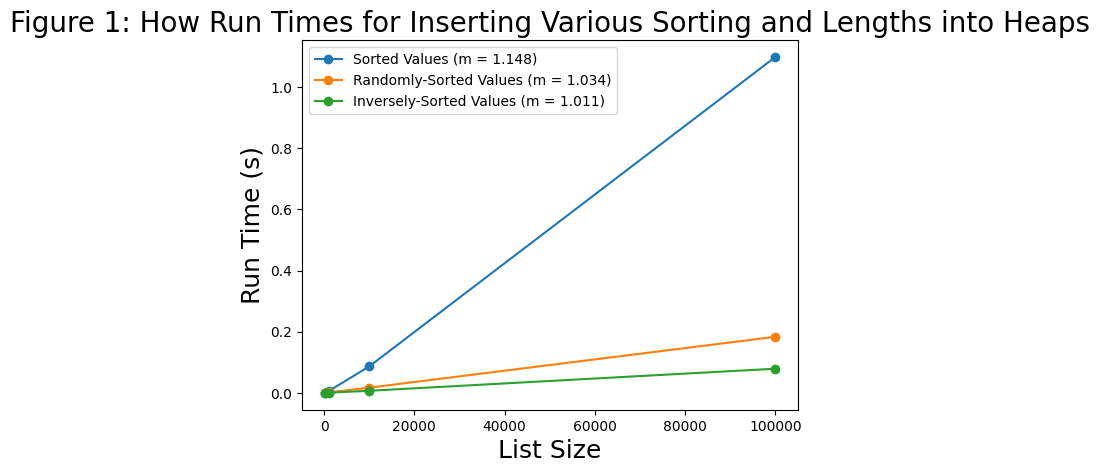

In [21]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, sorted_heap_benchmarks, 
        label = ('Sorted Values (m = ' + "{:.3f}".format(insert_sorted_slope) + ')'), 
        marker = 'o', linestyle = '-')
ax.plot(list_sizes, random_heap_benchmarks, 
        label = ('Randomly-Sorted Values (m = ' + "{:.3f}".format(insert_randomly_slope) + ')'), 
        marker = 'o', linestyle = '-')
ax.plot(list_sizes, inverse_heap_benchmarks, 
        label = ('Inversely-Sorted Values (m = ' + "{:.3f}".format(insert_inversely_slope) + ')'), marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 1: How Run Times for Inserting Various Sorting and Lengths into Heaps',
             fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

##### Inserting Element One-By-One vs. All At Once:

The following cell creates a line graph to visualize the runtimes for inserting various amounts of sorted elements one at a time and all at once into a heap. This is done using the matplotlib library.

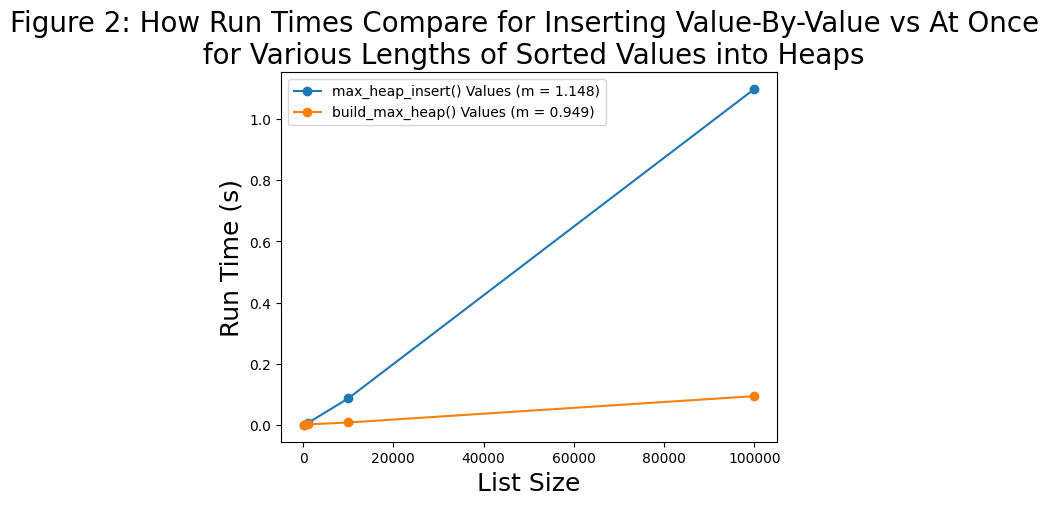

In [22]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, sorted_heap_benchmarks, 
        label = ('max_heap_insert() Values (m = ' + "{:.3f}".format(insert_sorted_slope) + ')'), 
        marker = 'o', linestyle = '-')
ax.plot(list_sizes, all_sorted_heap_benchmarks, 
        label = ('build_max_heap() Values (m = ' + "{:.3f}".format(insert_all_sorted_slope) + ')'), marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 2: How Run Times Compare for Inserting Value-By-Value vs At Once \n for Various Lengths of Sorted Values into Heaps',
             fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

The following cell creates a line graph to visualize the runtimes for inserting various amounts of randomly-sorted elements one at a time and all at once into a heap. This is done using the matplotlib library.

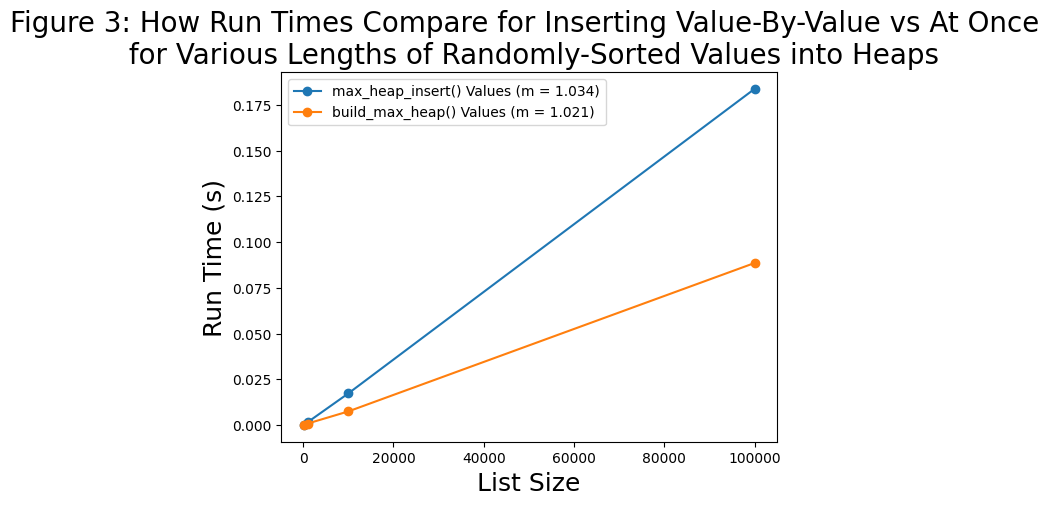

In [23]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, random_heap_benchmarks, 
        label = ('max_heap_insert() Values (m = ' + "{:.3f}".format(insert_randomly_slope) + ')'),
        marker = 'o', linestyle = '-')
ax.plot(list_sizes, all_randomly_heap_benchmarks, 
        label = ('build_max_heap() Values (m = ' + "{:.3f}".format(insert_all_randomly_slope) + ')'),
        marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 3: How Run Times Compare for Inserting Value-By-Value vs At Once \n for Various Lengths of Randomly-Sorted Values into Heaps',
             fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

The following cell creates a line graph to visualize the runtimes for inserting various amounts of inversely-sorted elements one at a time and all at once into a heap. This is done using the matplotlib library.

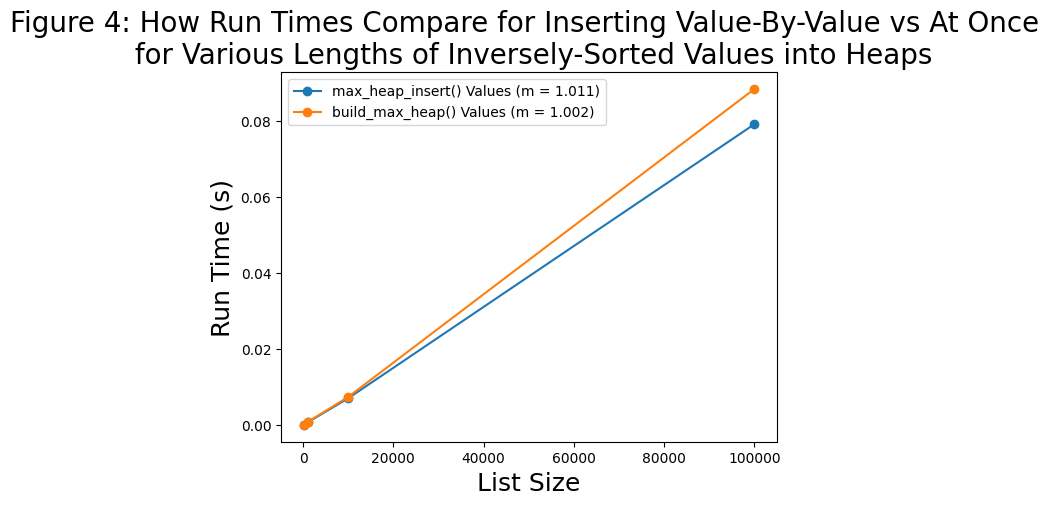

In [24]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, inverse_heap_benchmarks, 
        label = ('max_heap_insert() Values (m = ' + "{:.3f}".format(insert_inversely_slope) + ')'),
        marker = 'o', linestyle = '-')
ax.plot(list_sizes, all_randomly_heap_benchmarks, 
        label = ('build_max_heap() Values (m = ' + "{:.3f}".format(insert_all_inversely_slope) + ')'),
        marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 4: How Run Times Compare for Inserting Value-By-Value vs At Once \n for Various Lengths of Inversely-Sorted Values into Heaps',
             fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

The following cell creates a line graph to visualize the runtimes for inserting and extracting various amounts of randomly-sorted elements one at a time and all at once into a heap. This is done using the matplotlib library.

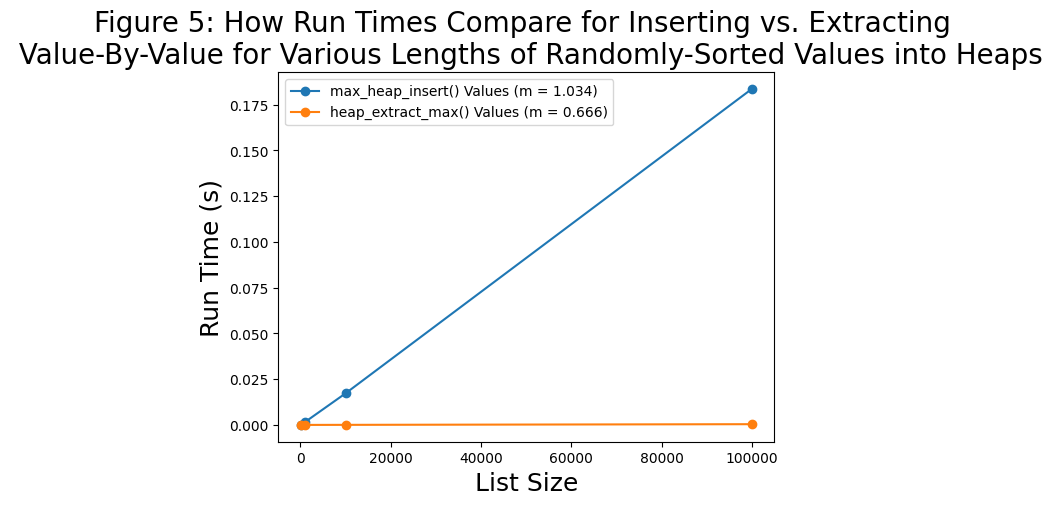

In [25]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, random_heap_benchmarks,
        label = ('max_heap_insert() Values (m = ' + "{:.3f}".format(insert_randomly_slope) + ')'),
        marker = 'o', linestyle = '-')
ax.plot(list_sizes, extract_random_heap_benchmarks,
        label = ('heap_extract_max() Values (m = ' + "{:.3f}".format(extract_randomly_slope) + ')'),
        marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 5: How Run Times Compare for Inserting vs. Extracting \n Value-By-Value for Various Lengths of Randomly-Sorted Values into Heaps',
             fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

### Analyze Heap Operation Run Times:

**1.) Does the heap creation run time vary between the three scenarios?  Which cases are the best-, average-, and worst-cases?**
    The heap creation run time (max_heap_insert()) do have varying runtimes between the three scenarios. The best case is when the elements are inversely-sorted. The average case is when elements are randomly-sorted. The worst case is when the elements are sorted.
    

**2.) Why do you think the best case is faster than the worst case?  (Hint: think about how a single element is added to the heap and the process for "bubbling" that element up or down to maintain the heap invariant property.)**
    The inversely-sorted case is much faster than when elements are sorted because the heap doesn't need to keep shifting values up the heap. Elements are added to the bottom of the heap, and then the heap needs to be checked that all children are smaller than their parents. When adding elements from largest to smallest (inversely-sorted), the next added element is always smaller than their parent, so no shifting of values needs to be done. However, with sorted elements, the children are always going to be larger than their parent, so value shifting must be done at each insertion.


**3.) Which is faster: building the entire heap at once or inserting one element at a time?  Why?**
    Building the entire heap at once is faster than inserting one element at a time. This is because when you insert one element at a time, you have to start the element at the bottom of the tree, and ensure that it is smaller than its parent. However, when you make the heap all at once, you can start at the last non-leaf node before ensuring that the max heap property is maintained. Essentially, building the heap all at once prevents from checking that each layer of the heap meets the max heap property.


**4.) Is extracting an element from or inserting an element into the heap faster?  Why?**
    Extracting an element is faster than inserting. This is because the root of the heap is the maximum elements because of the max heap property. Then, the last element in the heap is shifted to the root, and the required shifting is done so the heap property is satisfied. When an element is inserting into the heap, it is put at the bottom, and the required shifting is done so the heap property is satisfied. Although these processes are similar, when extracting an element, a majority of the heap still satisfies the max heap property, so typically the number of shifts is less than insertion.
 

### Conclusion:

In this notebook, we benchmarked heapsort operations on different datasets and analyzed the run times. To complete these tasks, the notebook uses the functionality of time, random, matplotlib, scipy,
numpy, and shapely libraries. And the implemented heap.py script. After completing this notebook, we determined that inserting inversely-sorted elements one at a time was faster than sorted or randomly shuffled elements, inserting all elements at once is faster than one at a time, and extracting elements is quicker than inserting them one at a time.